# Imports

# Cas de tests, rendu 2

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

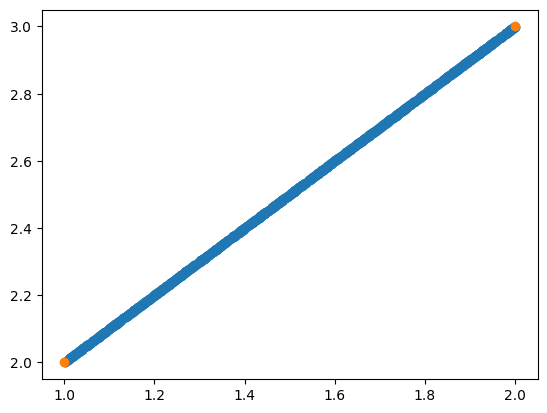

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
my_lib.delete_float_array.restype = None

X = np.array([
      [1],
      [2]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

layers = np.array([1, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

number_of_layers = len(layers_pmc)

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((2,)))

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.01, # learning rate
      10000, # epochs
      False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr,(2,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(1000) :
    x_1 = random.uniform(1,2)
    X_to_predict.append([x_1])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    False, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr,(1*len(X_to_predict),))

plt.scatter(X_to_predict,pmc_predict_model)
plt.scatter(X,Y)
plt.show()
plt.clf()

In [4]:
my_lib.delete_float_array(pmc_trained_model_ptr, 2)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

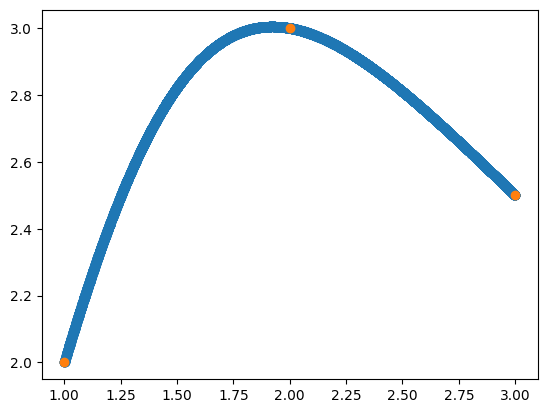

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
my_lib.delete_float_array.restype = None

layers = np.array([1, 16, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)


number_of_layers = len(layers_pmc)

X = np.array([
      [1],
      [2],
      [3]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3],
      [2.5]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((2*16+17,)))

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.001, # learning rate
      100000, # epochs
      False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (2*16+17,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(1.0,3.0)
    X_to_predict.append([x_1])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    False, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))

plt.scatter(X_to_predict,pmc_predict_model)
plt.scatter(X,Y)
plt.show()
plt.clf()

In [10]:
my_lib.delete_float_array(pmc_trained_model_ptr, 2*16+17)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

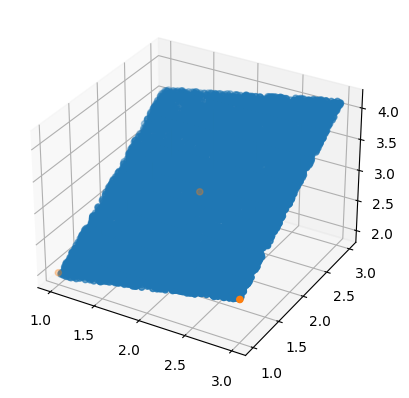

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
my_lib.delete_float_array.restype = None

layers = np.array([2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

number_of_layers = len(layers_pmc)

X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3],
      [2.5]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3,)))

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.001, # learning rate
      10000, # epochs
      False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (3,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(1.0,3.0)
    x_2 = random.uniform(1.0,3.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    False, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_to_predict[:,0],X_to_predict[:,1],pmc_predict_model)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()


In [12]:
my_lib.delete_float_array(pmc_trained_model_ptr, 3)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

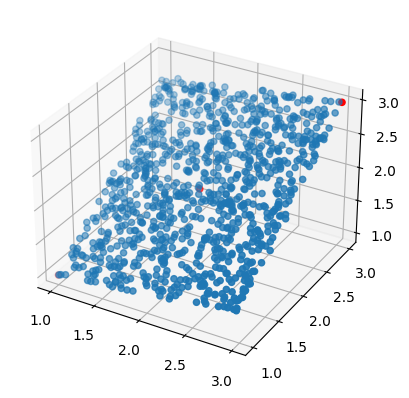

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
my_lib.delete_float_array.restype = None

layers = np.array([2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

number_of_layers = len(layers_pmc)

X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
],dtype=ctypes.c_float)
Y = np.array([
      [1],
      [2],
      [3]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)


my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3,)))

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.001, # learning rate
      10000, # epochs
      False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (3,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(1.0,3.0)
    x_2 = random.uniform(1.0,3.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    False, # is classification
)
pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_to_predict[:,0],X_to_predict[:,1],pmc_predict_model)
ax.scatter(X[:,0],X[:,1],Y,c='red')
plt.show()

In [17]:
my_lib.delete_float_array(pmc_trained_model_ptr, 3)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr


### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

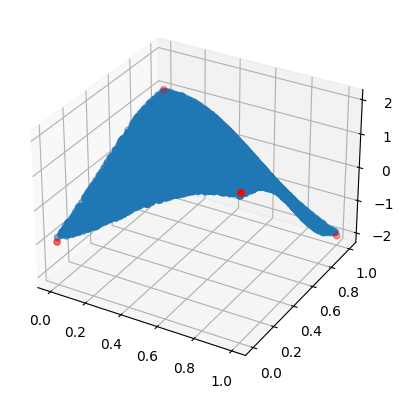

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
my_lib.delete_float_array.restype = None

layers = np.array([2, 2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

number_of_layers = len(layers_pmc)

X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [1],
      [-2],
      [-1]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.001, # learning rate
      10000, # epochs
      False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(0.0,1.0)
    x_2 = random.uniform(0.0,1.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    False, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_to_predict[:,0],X_to_predict[:,1],pmc_predict_model)
ax.scatter(X[:,0],X[:,1],Y,c='red')
plt.show()

In [19]:
my_lib.delete_float_array(pmc_trained_model_ptr, 9)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr